In [5]:
###한국은행 open-api사용하기

!pip install pyOpenSSL
!pip install request
!pip install bs4
!pip install tqdm

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [6]:
!pip install PublicDataReader

In [7]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm  



In [10]:
print(url)

# from PublicDataReader import Ecos
# service_key = "WR4MD0VXP0U1HD3I9U4Q"
# api = Ecos(service_key)
# df = api.get_statistic_table_list()
# df.tail()

NameError: name 'url' is not defined

In [11]:
from PublicDataReader import *

from PublicDataReader import Ecos
service_key = "WR4MD0VXP0U1HD3I9U4Q"
api = Ecos(service_key)
df = api.get_statistic_word(용어="소비자동향지수")
df.head()

,용어,용어설명
0,소비자동향지수,"소비자들이 느끼는 경기, 소비지출계획, 생활형편 등 경제에 대한 전반적인 인식을 조..."


In [12]:
## 100대 통계지표 열어보기

from PublicDataReader import Ecos
service_key = "WR4MD0VXP0U1HD3I9U4Q"
api = Ecos(service_key)
df = api.get_key_statistic_list()
df.head()


,통계그룹명,통계명,값,시점,단위
0,시장금리,한국은행 기준금리,3.5,20240114,%
1,시장금리,콜금리(익일물),3.473,20240115,%
2,시장금리,KORIBOR(3개월),3.67,20240116,%
3,시장금리,CD수익률(91일),3.72,20240116,%
4,시장금리,통안증권수익률(364일),3.3,20240116,%


In [13]:
df.tail()

,통계그룹명,통계명,값,시점,단위
95,부동산 가격,주택매매가격지수,96.3,202311,2021.6=100
96,부동산 가격,주택전세가격지수,92.4,202311,2021.6=100
97,부동산 가격,지가변동률(전기대비),0.157,202311,%
98,원자재,"국제유가(Dubai, 현물)",77.57,202312,달러
99,원자재,금,2034.7,202312,달러


In [14]:
df.shape

(100, 5)

In [15]:
df.describe()

,통계그룹명,통계명,값,시점,단위
count,100,100,100,100,93
unique,28,100,99,10,16
top,시장금리,한국은행 기준금리,3.3,202311,%
freq,8,1,2,34,27


In [16]:
##잘라넣기
df1=df.iloc[:,:-1]
df1


,통계그룹명,통계명,값,시점
0,시장금리,한국은행 기준금리,3.5,20240114
1,시장금리,콜금리(익일물),3.473,20240115
2,시장금리,KORIBOR(3개월),3.67,20240116
3,시장금리,CD수익률(91일),3.72,20240116
4,시장금리,통안증권수익률(364일),3.3,20240116
...,...,...,...,...
95,부동산 가격,주택매매가격지수,96.3,202311
96,부동산 가격,주택전세가격지수,92.4,202311
97,부동산 가격,지가변동률(전기대비),0.157,202311
98,원자재,"국제유가(Dubai, 현물)",77.57,202312


In [17]:
## 시간에 따라 분리하기



#시간순에 따라서 정렬하기 
import pandas as pd

date_list=[]


# '시점' 열을 기준으로 정렬
df_sorted = df1.sort_values(by='시점')

# 결과 출력
print(df_sorted)



       통계그룹명                  통계명        값        시점
60    기업경영지표            제조업매출액증감률    14.63      2022
76        인구                합계출산율    0.778      2022
61    기업경영지표         제조업매출액세전순이익률     5.93      2022
37  GDP대비 비율        수출입의 대 GNI 비율    100.6      2022
66    소득분배지표                5분위배율     5.76      2022
..       ...                  ...      ...       ...
4       시장금리        통안증권수익률(364일)      3.3  20240116
3       시장금리           CD수익률(91일)     3.72  20240116
2       시장금리         KORIBOR(3개월)     3.67  20240116
19        환율  원/엔(100엔) 환율(매매기준율)   905.09  20240116
22        주식                코스피지수  2497.59  20240116

[100 rows x 4 columns]


In [18]:
df['통계그룹명'].unique()

array(['시장금리', '여수신금리', '예금/대출금', '통화량', '환율', '주식', '채권', '성장률', '소득',
       'GDP대비 비율', '생산', '소비', '투자', '경기순환지표', '심리지표', '기업경영지표', '가계',
       '소득분배지표', '고용', '노동', '인구', '국제수지', '통관수출입', '대외채권/채무',
       '소비자/생산자 물가', '수출입 물가', '부동산 가격', '원자재'], dtype=object)

In [19]:
grouped_df=df.groupby('통계그룹명')

# 각 그룹의 내용 확인
for group_name, group_data in grouped_df:
    print(f"통계그룹명: {group_name}")
    print(group_data)
    print("\n")

통계그룹명: GDP대비 비율
       통계그룹명            통계명      값      시점  단위
35  GDP대비 비율           총저축률   32.9  2023Q3  % 
36  GDP대비 비율         국내총투자율   31.3  2023Q3  % 
37  GDP대비 비율  수출입의 대 GNI 비율  100.6    2022  % 


통계그룹명: 가계
   통계그룹명       통계명        값      시점  단위
63    가계  가구당월평균소득  6918541  2023Q3  원 
64    가계    평균소비성향     69.2  2023Q3  % 


통계그룹명: 경기순환지표
     통계그룹명          통계명     값      시점    단위
55  경기순환지표  경기동행지수순환변동치  98.9  202311  None
56  경기순환지표  경기선행지수순환변동치  99.9  202311  None


통계그룹명: 고용
   통계그룹명     통계명      값      시점   단위
67    고용     실업률    3.3  202312   % 
68    고용     고용률   61.7  202312   % 
69    고용  경제활동인구  29037  202312  천명 
70    고용    취업자수  28093  202312  천명 


통계그룹명: 국제수지
   통계그룹명       통계명       값      시점    단위
77  국제수지      경상수지  4059.7  202311  백만달러
78  국제수지  직접투자(자산)  4713.6  202311  백만달러
79  국제수지  직접투자(부채)  1357.9  202311  백만달러
80  국제수지  증권투자(자산)  3985.4  202311  백만달러
81  국제수지  증권투자(부채)  6192.5  202311  백만달러


통계그룹명: 기업경영지표
     통계그룹명           통계명      값    시점  단위
6

In [20]:
df_selected = df.iloc[:, [1, 2]]

# '통계그룹명'을 기준으로 묶기
grouped_df1 = df_selected.groupby(df['통계그룹명'])


for group_name, group_data in grouped_df1:
    print(f"통계그룹명: {group_name}")
    print(group_data)
    print("\n")

통계그룹명: GDP대비 비율
              통계명      값
35           총저축률   32.9
36         국내총투자율   31.3
37  수출입의 대 GNI 비율  100.6


통계그룹명: 가계
         통계명        값
63  가구당월평균소득  6918541
64    평균소비성향     69.2


통계그룹명: 경기순환지표
            통계명     값
55  경기동행지수순환변동치  98.9
56  경기선행지수순환변동치  99.9


통계그룹명: 고용
       통계명      값
67     실업률    3.3
68     고용률   61.7
69  경제활동인구  29037
70    취업자수  28093


통계그룹명: 국제수지
         통계명       값
77      경상수지  4059.7
78  직접투자(자산)  4713.6
79  직접투자(부채)  1357.9
80  증권투자(자산)  3985.4
81  증권투자(부채)  6192.5


통계그룹명: 기업경영지표
             통계명      값
60     제조업매출액증감률  14.63
61  제조업매출액세전순이익률   5.93
62       제조업부채비율  76.95


통계그룹명: 노동
          통계명      값
71  시간당명목임금지수  117.1
72    노동생산성지수  106.5
73   단위노동비용지수  110.9


통계그룹명: 대외채권/채무
      통계명          값
86  외환보유액  420147908
87   대외채무   649322.1
88   대외채권    1002040


통계그룹명: 부동산 가격
            통계명      값
95     주택매매가격지수   96.3
96     주택전세가격지수   92.4
97  지가변동률(전기대비)  0.157


통계그룹명: 생산
                통계명      값
38  전산업생산지수(농림어업제외)  111.6

In [21]:
import pandas as pd
###########중복된 통계명 지우기


# '통계그룹명'을 기준으로 묶기
grouped_df1 = df_selected.groupby(df['통계그룹명'])

# 각 그룹에 대해 중복된 통계명을 가진 행 삭제
grouped_df1_cleaned = grouped_df1.apply(lambda x: x.drop_duplicates(subset='통계명', keep='first'))

# 결과 출력
print("중복된 통계명을 가진 행 삭제 후 DataFrame:\n", grouped_df1_cleaned)


중복된 통계명을 가진 행 삭제 후 DataFrame:
                              통계명           값
통계그룹명                                       
GDP대비 비율 35                 총저축률        32.9
         36               국내총투자율        31.3
         37        수출입의 대 GNI 비율       100.6
가계       63             가구당월평균소득     6918541
         64               평균소비성향        69.2
...                          ...         ...
투자       54               건축착공면적  9273830.13
환율       18          원/달러 환율(종가)      1331.8
         19  원/엔(100엔) 환율(매매기준율)      905.09
         20       원/유로 환율(매매기준율)     1444.44
         21          원/위안 환율(종가)      185.02

[100 rows x 2 columns]


In [22]:
grouped_df1_cleaned

통계명           값
통계그룹명                                       
GDP대비 비율 35                 총저축률        32.9
         36               국내총투자율        31.3
         37        수출입의 대 GNI 비율       100.6
가계       63             가구당월평균소득     6918541
         64               평균소비성향        69.2
...                          ...         ...
투자       54               건축착공면적  9273830.13
환율       18          원/달러 환율(종가)      1331.8
         19  원/엔(100엔) 환율(매매기준율)      905.09
         20       원/유로 환율(매매기준율)     1444.44
         21          원/위안 환율(종가)      185.02

[100 rows x 2 columns]

In [23]:
grouped_df1_cleaned['값'].info()

<class 'pandas.core.series.Series'>
MultiIndex: 100 entries, ('GDP대비 비율', 35) to ('환율', 21)
Series name: 값
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [24]:
grouped_df1_cleaned['값']=grouped_df1_cleaned['값'].astype(float)

grouped_df1_cleaned['값']

통계그룹명       
GDP대비 비율  35         32.90
          36         31.30
          37        100.60
가계        63    6918541.00
          64         69.20
                   ...    
투자        54    9273830.13
환율        18       1331.80
          19        905.09
          20       1444.44
          21        185.02
Name: 값, Length: 100, dtype: float64

In [35]:
for row in grouped_df1_cleaned:
    print(row)

통계명
값


In [25]:
####이런 식으로 정리해서 만들기

gdp_대비비율=[32.90,31.30,100.60]
가계=[ 1320.20,905.09,1444.44]

tmp=pd.DataFrame({'gpd':gdp_대비비율,
'가계':가계})

tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gpd     3 non-null      float64
 1   가계      3 non-null      float64
dtypes: float64(2)
memory usage: 180.0 bytes


In [26]:
grouped_df1_cleaned['통계명']=grouped_df1_cleaned['통계명'].astype(str)

type(grouped_df1_cleaned['통계명'])
grouped_df1_cleaned['통계명']

통계그룹명       
GDP대비 비율  35                   총저축률
          36                 국내총투자율
          37          수출입의 대 GNI 비율
가계        63               가구당월평균소득
          64                 평균소비성향
                       ...         
투자        54                 건축착공면적
환율        18            원/달러 환율(종가)
          19    원/엔(100엔) 환율(매매기준율)
          20         원/유로 환율(매매기준율)
          21            원/위안 환율(종가)
Name: 통계명, Length: 100, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


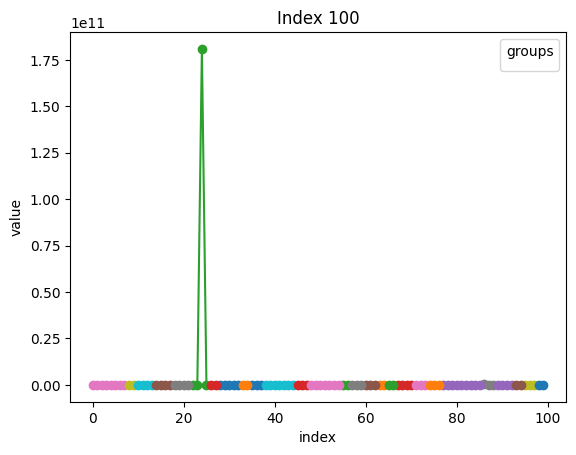

In [27]:
import matplotlib.pyplot as plt

# '값' 열에 대한 선 그래프 그리기
plt.plot(grouped_df1_cleaned['값'].unstack().T, marker='o')

# 그래프에 제목과 레이블 추가
plt.title('Index 100')
plt.xlabel('index')
plt.ylabel('value')

# 범례 추가
plt.legend(title='groups')

# 그래프 표시
plt.show()


In [36]:
print(type(df_sorted))

df_sorted1=df_sorted.iloc[:,2:3]

df_sorted1



<class 'pandas.core.frame.DataFrame'>


,값
60,14.63
76,0.778
61,5.93
37,100.6
66,5.76
...,...
4,3.3
3,3.72
2,3.67
19,905.09


In [38]:
correlation=df_sorted1.corr()
correlation

,값
값,1.0


c:\Users\bluecom012\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\bluecom012\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


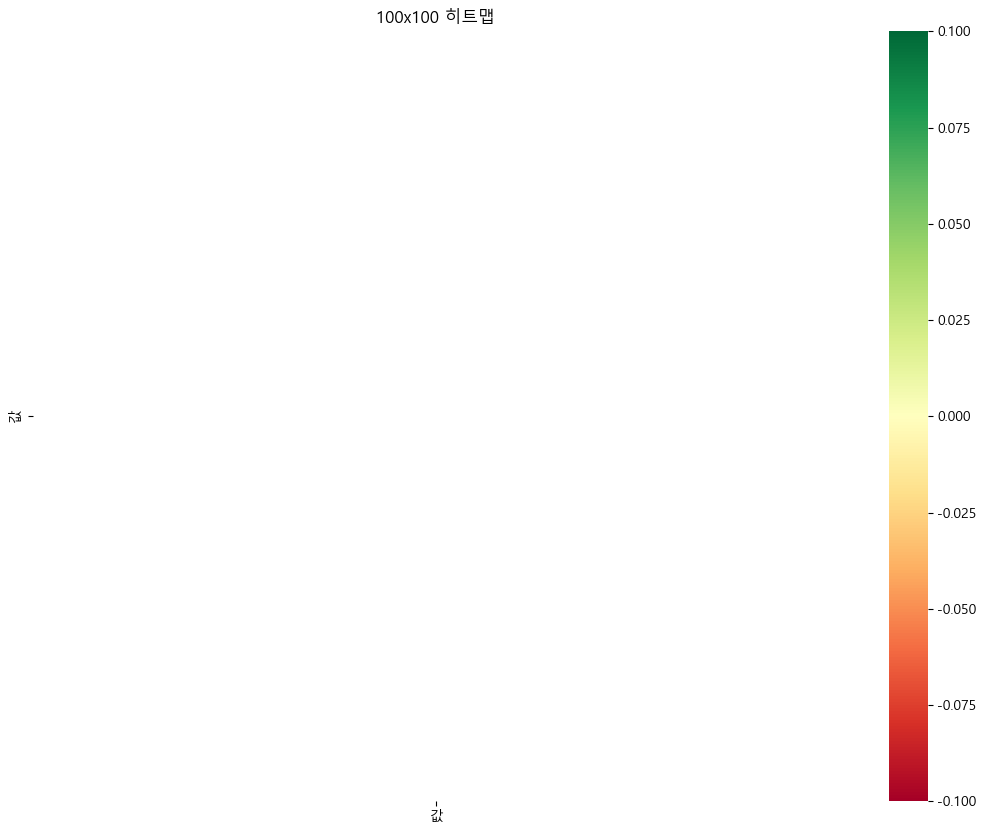

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Matplotlib figure 크기 설정
plt.figure(figsize=(13, 10))

# 히트맵 제목 설정
plt.title('100x100 히트맵')

# DataFrame에서 상관 행렬 계산
correlation = df_sorted1.corr()

# 상삼각행렬 만들기
upp_mat = np.triu(correlation)

# Seaborn을 사용하여 히트맵 그리기
sns.heatmap(correlation, annot=True, cmap='RdYlGn', mask=upp_mat)

# 플롯 보이기
plt.show()


In [ ]:
##############
#문제점
####################

히트맵이 그려지지 않음
    corr가 제대로 구해지지 않음
        데이터의 형식때문에 cor을 함부러 돌릴 수 없음
            데이터 형식? 문자열을 숫자열로 돌릴 수 없다라는 말이었음